In [77]:
import sys 
#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append("../..") # add standard 's modules
# sys.path.append('/home/hbkoziel/pyfesom/codes/modules')
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')

import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time
from matplotlib import cm
from scipy.interpolate import griddata
sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

In [78]:
year = 2014

In [79]:
runid	= 'Arc14'
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
mesh_id    = 'meshArc20'
meshpath   = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/'+mesh_id+'/'           # Defining path where mesh is stored
mesh20 = pf.load_mesh(meshpath, usepickle=True, get3d=False)  

ncfile      = meshpath+'Arc20.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel20 = f.variables['cluster_area'][:]

ncfile       = input_directory+runid+'.'+str(year)+'.bio.mean.nc'
f           = Dataset(ncfile, 'r')
pp_arc14 =  f.variables['diags_bio1_mean'][:,:].sum(axis=0) + f.variables['diags_bio2_mean'][:,:].sum(axis=0)
pp_arc14 = pp_arc14*12*30 / 1000

time_arc14 =  f.variables['time'][:]

/scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc20/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc20/pickle_mesh


In [80]:
runid	= 'Arc12'
input_directory  = '/scratch/usr/hbkvsk12/hlrn3_work2/results/'+runid+'/'
mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkvsk12/hlrn3_work2/mesh/'+mesh_id+'/'           # Defining path where mesh is stored
mesh4 = pf.load_mesh(meshpath, usepickle=True, get3d=False)  

ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel4 = f.variables['cluster_area'][:]

ncfile       = input_directory+runid+'.'+str(year)+'.bio.mean.nc'
f           = Dataset(ncfile, 'r')
pp_arc12 =  f.variables['diags_bio1_mean'][:,:].sum(axis=0) + f.variables['diags_bio2_mean'][:,:].sum(axis=0)
pp_arc12 = pp_arc12*12*2 / 1000 # conversion mmol C m2 -> g C m2

/scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkvsk12/hlrn3_work2/mesh/meshArc4.5/pickle_mesh


In [81]:
pp_arc12_int = griddata((mesh4.x2, mesh4.y2), pp_arc12, (mesh20.x2, mesh20.y2), method='linear')#nearest ?

For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used
For depth 0 model level -0.0 will be used


/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:80: RuntimeWarning: invalid value encountered in less_equal
/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in greater_equal


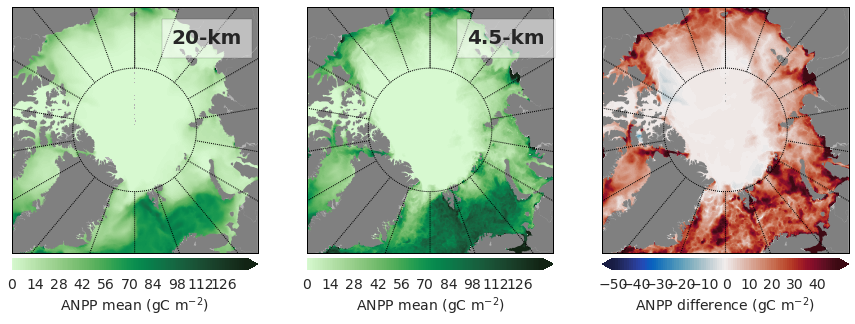

In [91]:
contours = np.arange(0, 140, 1)
contours2 = np.arange(-50, 50, 1)

fig = plt.figure(figsize=(15, 25), facecolor='w', edgecolor='k')


ax1      = fig.add_subplot(131)
pp_arc14[pp_arc14 == 0] = np.nan
data, elem_no_nan = pf.get_data(pp_arc14,mesh20,0)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh20.x2, mesh20.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')

#eps=(contours.max()-contours.min())/100.
#data2[data2<=contours.min()]=contours.min()+eps
#data2[data2>=contours.max()]=contours.max()-eps

plt.annotate('20-km', xy=(0.65, 0.85), xycoords='axes fraction', fontsize = 20,
                     fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.algae, extend='max')

label = 'ANPP mean (gC m$^{-2}$)'
#plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=14)




ax2      = fig.add_subplot(132)
pp_arc12[pp_arc12 == 0] = np.nan
data, elem_no_nan = pf.get_data(pp_arc12,mesh4,0)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh4.x2, mesh4.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')

#eps=(contours.max()-contours.min())/100.
#data2[data2<=contours.min()]=contours.min()+eps
#data2[data2>=contours.max()]=contours.max()-eps
plt.annotate('4.5-km', xy=(0.65, 0.85), xycoords='axes fraction', fontsize = 20,
                     fontweight = 'bold', bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours, cmap=cmap.cm.algae, extend='max')

label = 'ANPP mean (gC m$^{-2}$)'
#plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=14)

ax3      = fig.add_subplot(133)
diff = pp_arc12_int-pp_arc14

data, elem_no_nan = pf.get_data(diff,mesh20,0)
m = Basemap(projection='nplaea',boundinglat=70,lon_0=0,resolution='l')
x, y = m(mesh20.x2, mesh20.y2)
#map.drawcoastlines()
plabels=[False,False,False,False]
mlabels=[False,False,False,False]    
m.drawparallels(np.arange(-80.,81.,20.), labels=plabels)
m.drawmeridians(np.arange(-180.,181.,20.),labels=mlabels) #[0,1,0,0]
m.drawmapboundary(fill_color='0.7')
m.fillcontinents(color='.5',lake_color='.7')

eps=(contours2.max()-contours2.min())/100.
data[data<=contours2.min()]=contours2.min()+eps
data[data>=contours2.max()]=contours2.max()-eps

im=plt.tricontourf(x, y, elem_no_nan, data, levels=contours2, cmap=cmap.cm.balance, extend='both')

label = 'ANPP difference (gC m$^{-2}$)'
#plt.title(year)
cbar=m.colorbar(im,"bottom", size="5%", pad="2%")
cbar.set_label(label, fontsize=14)
cbar.ax.tick_params(labelsize=14)

In [83]:
ind_arc4 = np.where(mesh4.y2>66)
ind_arc20 = np.where(mesh20.y2>66)

In [84]:
NPP_ARC12 = np.sum(pp_arc12[ind_arc4]*NodalAreaModel4[ind_arc4])
NPP_ARC14 = np.sum(pp_arc14[ind_arc20]*NodalAreaModel20[ind_arc20])

In [85]:
TNPP12 = NPP_ARC12/10**12
TNPP14 = NPP_ARC14/10**12
print TNPP12
print TNPP14
print -100+100*(TNPP12/TNPP14)

434.2165937625306
262.7953725407961
65.22992378609072
